In [9]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [10]:
col_names = ['X', 'Y']

data = pd.read_csv("Book1.csv", skiprows = 1, names = col_names)
data.head(5)

,X,Y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


# Question 4

PART 1

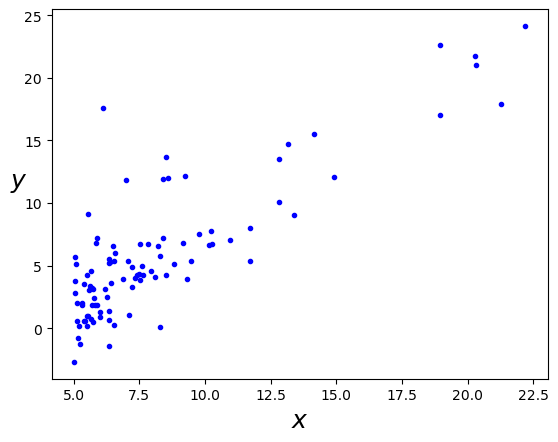

In [14]:
data_mat = data.values
X = data_mat[:,0].reshape(-1, 1)
y = data_mat[:,1].reshape(-1, 1)
plt.plot(X, y, "b.")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

In [32]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=100)
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [33]:
print(lr.intercept_, lr.coef_)

[-3.63457865] [[1.14764168]]


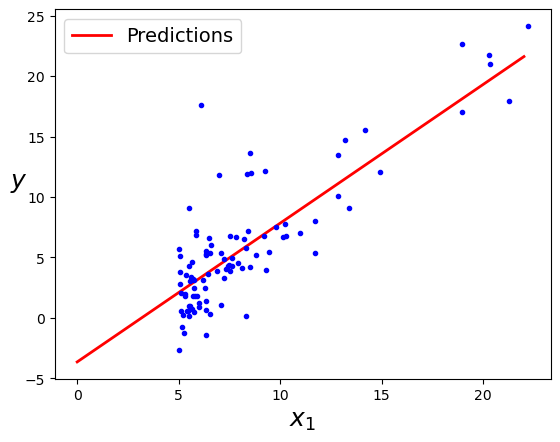

In [34]:
X_new = np.arange(0, 24, 2).reshape(-1, 1)
pred = lr.predict(X_new)
plt.plot(X_new, pred, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.show()

PART 2

In [35]:
X_b = np.c_[np.ones((97,1)), X]
X_train_b = np.c_[np.ones((77,1)), X_train]
X_test_b = np.c_[np.ones((20, 1)), X_test]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[-3.89578088],
       [ 1.19303364]])

PART 3

BATCH

In [36]:
np.random.seed(42)
def batch_GD(n_iterations, m, eta, x, y):
    theta = np.random.randn(2,1)
    MSE = []
    theta_path_bgd = []
    for iteration in range(n_iterations):
        gradients = 2/m * x.T.dot(x.dot(theta) - y)
        theta = theta - eta * gradients
        e = np.mean((y-x.dot(theta))**2)
        MSE.append(e)
        theta_path_bgd.append(theta)
    return theta, MSE, theta_path_bgd

TRAINING SET

In [37]:
np.random.seed(42)
theta, MSE, theta_path_bgd = batch_GD(1000, 77, 0.01, X_train_b, y_train)
theta

array([[-3.46557114],
       [ 1.12957252]])

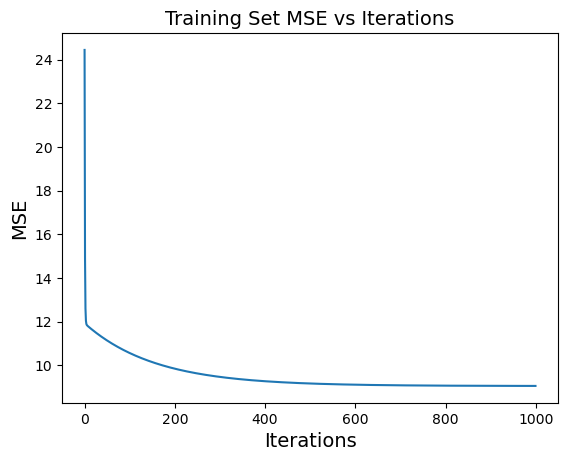

In [38]:
np.random.seed(42)
n_iter = np.arange(0, 1000)
plt.plot(n_iter, MSE)
plt.xlabel("Iterations", fontsize=14)
plt.ylabel("MSE", fontsize = 14)
plt.title("Training Set MSE vs Iterations", fontsize = 14)
plt.show()

TEST SET

In [39]:
np.random.seed(42)
theta, MSE, theta_path_bgd1 = batch_GD(1000, 77, 0.01, X_test_b, y_test)
theta

array([[-2.58306324],
       [ 1.12723981]])

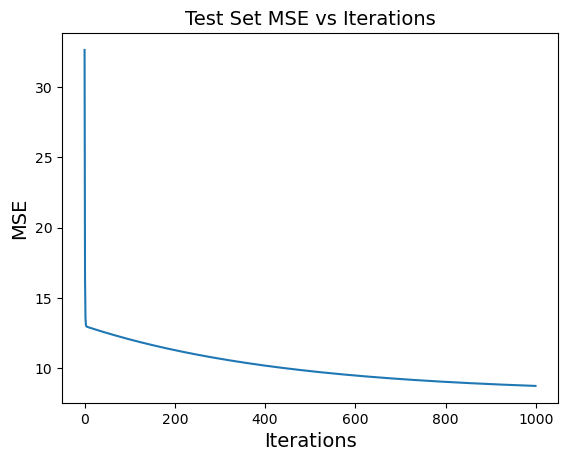

In [40]:
np.random.seed(42)
n_iter = np.arange(0, 1000)
plt.plot(n_iter, MSE)
plt.xlabel("Iterations", fontsize=14)
plt.ylabel("MSE", fontsize = 14)
plt.title("Test Set MSE vs Iterations", fontsize = 14)
plt.show()

STOCHASTIC

In [41]:
np.random.seed(42)
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

def stochGD(n_epochs, m, x, y):
    theta = np.random.randn(2,1)
    theta_path_sgd = []
    MSE = np.zeros(50)

    for epoch in range(n_epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = x[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            eta = learning_schedule(epoch * m + i)
            theta = theta - eta * gradients
            theta_path_sgd.append(theta)
        MSE[epoch] = ((yi-xi.dot(theta))**2)/m
        if MSE[epoch] < 10:          # this condition would break the iterations once the MSE is less than 10
            break
    return MSE, theta, theta_path_sgd

In [42]:
np.random.seed(42)
MSEs, theta, theta_path_sgd = stochGD(50, len(X_train_b), X_train_b, y_train)
theta

array([[ 6.44144176e+82],
       [-8.54404074e+81]])

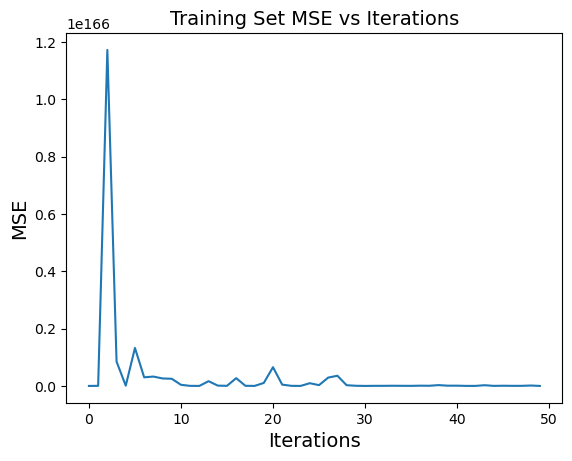

In [43]:
np.random.seed(42)
length = np.arange(0, 50)
plt.plot(length, MSEs)
plt.xlabel("Iterations", fontsize=14)
plt.ylabel("MSE", fontsize = 14)
plt.title("Training Set MSE vs Iterations", fontsize = 14)
plt.show()

In [44]:
np.random.seed(42)
MSEs1, theta, theta_path_sgd1 = stochGD(50, len(X_test_b), X_test_b, y_test)
theta

array([[ 1.41746597e+114],
       [-2.21973770e+113]])

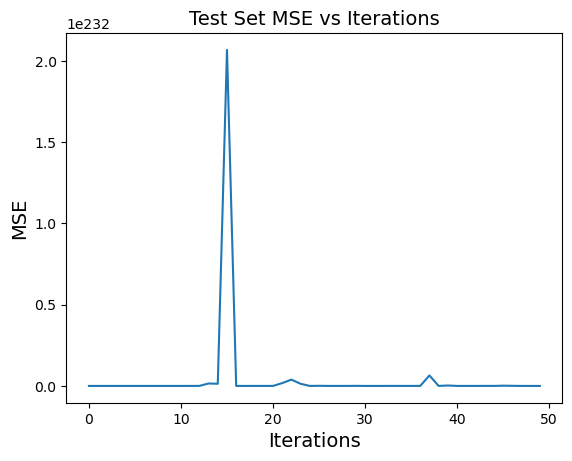

In [45]:
np.random.seed(42)
length1 = np.arange(0, 50)
plt.plot(length1, MSEs1)
plt.xlabel("Iterations", fontsize=14)
plt.ylabel("MSE", fontsize = 14)
plt.title("Test Set MSE vs Iterations", fontsize = 14)
plt.show()

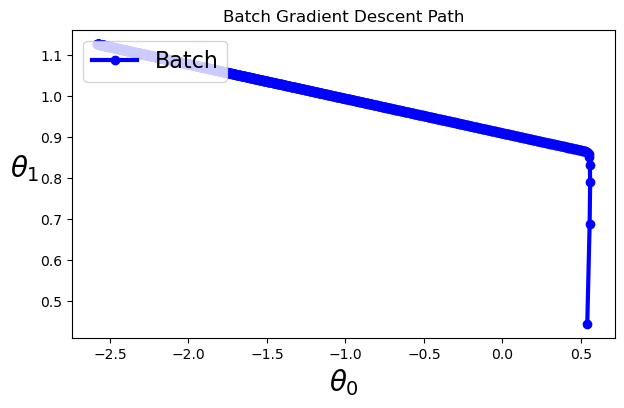

In [46]:
np.random.seed(42)
theta_path_bgd1 = np.array(theta_path_bgd1)
theta_path_sgd1 = np.array(theta_path_sgd1)

plt.figure(figsize=(7,4))
plt.plot(theta_path_bgd1[:, 0], theta_path_bgd1[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.title("Batch Gradient Descent Path")
plt.show()

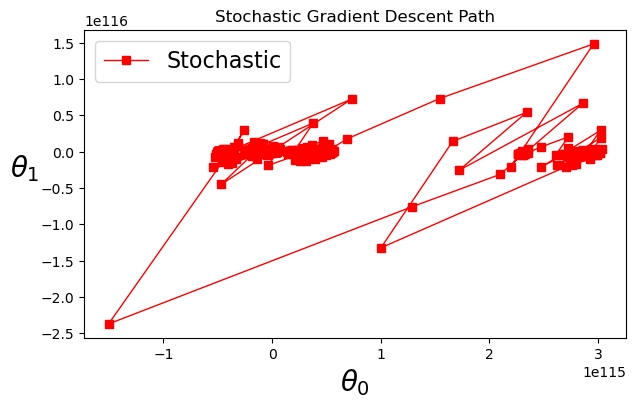

In [47]:
np.random.seed(42)
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd1[:, 0], theta_path_sgd1[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.title("Stochastic Gradient Descent Path")
plt.show()

In [48]:
len(theta_path_sgd1)

1000

With the termination condition on the cost function, the stochastic gradient descent still went through all iterations meaning that it never reached a MSE of less than 10. The length of the theta_paths of both stochastic GD and batch GD are 1000 meaning that they took the same amount of time, however batch GD on the test set was able to converge to a theta close to theta_best from the normal equation. This shows that batch GD was far more accurate, and that maybe there needed to be more epochs for the stochastic GD to eventually reach the minimum. I also plotted them separately because the stochastic GD path jumps around to much greater values of theta than batch GD, if plotted together you are unable to see the batch GD path.

MSE vs LEARNING RATE

In [49]:
#Using Final MSE Value After Batch Gradient Descent
#Changed learning rates from 0.01, 0.02, ..., 0.1 to 0.001, 0.002, ..., 0.01
np.random.seed(42)
eta = 0.001
learn = []
MSE_train = []
MSE_test = []
for i in range(10):
    theta, MSE, theta_path = batch_GD(1000, 77, eta, X_train_b, y_train)
    thetat, MSEt, theta_patht = batch_GD(1000, 20, eta, X_test_b, y_test)
    MSE_train.append(MSE[999])
    MSE_test.append(MSEt[999])
    learn.append(eta)
    eta += 0.001

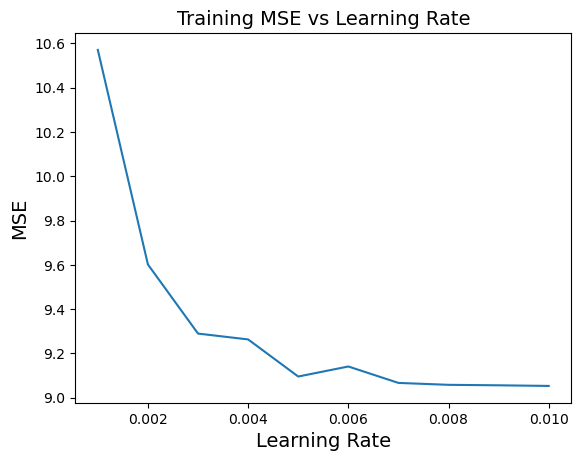

In [50]:
np.random.seed(42)
plt.plot(learn, MSE_train)
plt.xlabel("Learning Rate", fontsize=14)
plt.ylabel("MSE", fontsize = 14)
plt.title("Training MSE vs Learning Rate", fontsize = 14)
plt.show()

Based on the plot above from the training data, the best learning rate is 0.01. We can see that at this learning rate the MSE is at its minimum value. When using the original learning rates (0.01, 0.02, ..., 0.1) I noticed that ).01 was the only learning rate that didn't return an MSE of inf or nan. When using the smaller learning rates, we can see the the path of MSE to its best learning rate.

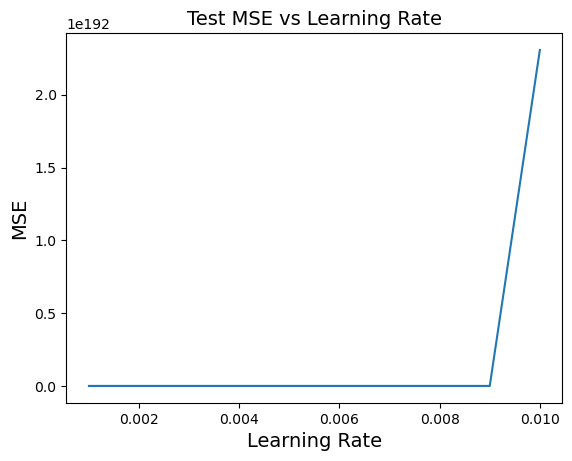

In [51]:
np.random.seed(42)
plt.plot(learn, MSE_test)
plt.xlabel("Learning Rate", fontsize=14)
plt.ylabel("MSE", fontsize = 14)
plt.title("Test MSE vs Learning Rate", fontsize = 14)
plt.show()

When looking at the training set MSE vs the different learning rates, we can see that once the learning rate jumps from 0.009 to 0.01 the MSE increases significantly. This could be because the test data is much smaller than the training data, so smaller learning rates are better on this data. When the learning rate is 0.01 or greater, the gradient descent might skip over the minimum value leading to an increase in error.